In [14]:
"feature_selection_with_label_gender_v01 has threshold being 0.4"
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
threshold = 0.4
label = True # Fasle for correlation without label
binary_classify = True # False for multi-classify
data_path = "../data/data.csv"

In [16]:
data = pd.read_csv(data_path)
data_male = data[data['Gender']=='Nam']
data_female = data[data['Gender']=='Nữ']

In [17]:
data_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 98
Columns: 102 entries, No. to Binary-label
dtypes: float64(77), int64(21), object(4)
memory usage: 45.9+ KB


In [18]:
data_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 99
Columns: 102 entries, No. to Binary-label
dtypes: float64(77), int64(21), object(4)
memory usage: 34.6+ KB


In [19]:
def preprocess_data(data, binary_classify):
    data = data.drop(columns=['No.', 'Full Name', 'Sample ID', 'Birth year', 'Gender'])
    if not binary_classify:
        data = data.drop(columns=['Binary-label'])
    data = data.drop(columns=['Multi-label'])
    return data

In [20]:
data_male = preprocess_data(data_male, binary_classify)
data_female = preprocess_data(data_female, binary_classify)

In [21]:
def feature_selection(data, label):
    # select all columns of numeric types (including the label column if applicable)
    num_col = list(data.select_dtypes(include='number').columns)

    if label:
        # compute pairwise correlation of columns
        corr_matrix = data[num_col].corr()

        # corr. value between X and Y, where X = 'label' and Y is an arbitrary column
        corr_xy_given_x_is_label = corr_matrix['Binary-label']

        most_corr_values = corr_xy_given_x_is_label[abs(corr_xy_given_x_is_label) > threshold]

        multi_cols = most_corr_values.index
    else:
        num_col.remove('Binary-label')

        corr_matrix = (data[num_col].corr())

        corr_features_mean = corr_matrix.mean(axis=0)

        most_corr_values = corr_features_mean[(corr_features_mean) > threshold]

        multi_cols = most_corr_values.index

        multi_cols = pd.Index(list(multi_cols) + ['Binary-label'])
    return multi_cols


In [22]:
multi_cols_male = feature_selection(data_male, label)
multi_cols_female = feature_selection(data_female, label)

In [23]:
len(multi_cols_male)

23

In [24]:
len(multi_cols_female)

23

In [25]:
multi_cols_male

Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8',
       'D1_Abs CD19', 'D1_Abs CD56', 'D2_Lympho', 'D2_Mono', 'D3_Lympho',
       'D3_Class-switched', 'D3_Q1_ naive', 'D3_Q1_ memory', 'D3_Q1_ CD21 low',
       'D4_Lympho', 'D4_CD4- CD8-', 'D4_CD8, CD45RA+ CD62L+',
       'D4_CD8, CD45RA+CD197+', 'D5_NK, CD69+', 'D5_T, CD25+', 'D6_Lympho',
       'D6_NKp44 PE-A Median', 'D7_PBMNCs (10^6)', 'Binary-label'],
      dtype='object')

In [26]:
multi_cols_female

Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8', 'D1_%CD19',
       'D2_Lympho', 'D2_Mono', 'D2_Mono, CD14+ HLA_DR+', 'D2_B cells',
       'D3_Lympho', 'D3_B cells', 'D3_Class-switched', 'D3_Q1_ naive',
       'D3_Q1_ memory', 'D3_Q1_ CD21 low', 'D4_Lympho', 'D4_T cells',
       'D4_NK, CD62L+', 'D5_T cell', 'D5_NK, CD69+', 'D6_Lympho', 'D6_T cells',
       'Binary-label'],
      dtype='object')

In [27]:
data_male_selected = data_male[multi_cols_male]
data_female_selected = data_female[multi_cols_female]

In [28]:
data_male_selected_melt = pd.melt(data_male_selected, id_vars="Binary-label",
               var_name="features",
               value_name="value")
data_female_selected_melt = pd.melt(data_female_selected, id_vars="Binary-label",
               var_name="features",
               value_name="value")

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

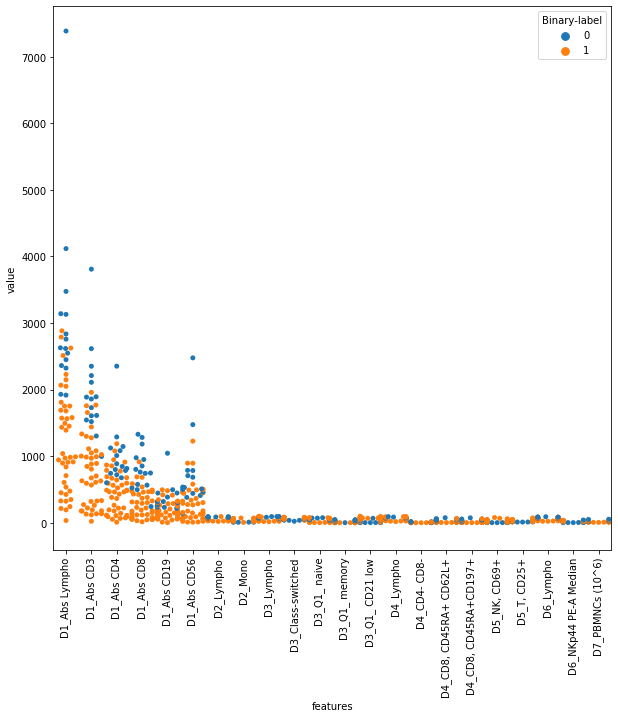

In [29]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_male_selected_melt)

plt.xticks(rotation=90)

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.0% of the points 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

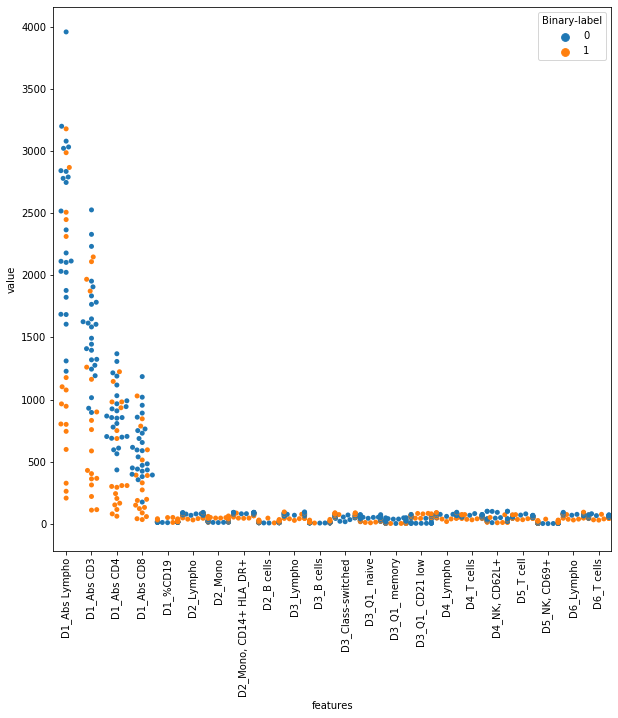

In [30]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_female_selected_melt)

plt.xticks(rotation=90)

In [31]:
multi_cols_male_small = multi_cols_male.drop(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8', 'D1_Abs CD19', 'D1_Abs CD56'])
multi_cols_male_small

Index(['D2_Lympho', 'D2_Mono', 'D3_Lympho', 'D3_Class-switched',
       'D3_Q1_ naive', 'D3_Q1_ memory', 'D3_Q1_ CD21 low', 'D4_Lympho',
       'D4_CD4- CD8-', 'D4_CD8, CD45RA+ CD62L+', 'D4_CD8, CD45RA+CD197+',
       'D5_NK, CD69+', 'D5_T, CD25+', 'D6_Lympho', 'D6_NKp44 PE-A Median',
       'D7_PBMNCs (10^6)', 'Binary-label'],
      dtype='object')

In [32]:
data_male_selected_small = data_male[multi_cols_male_small]

In [33]:
data_male_selected_small_melt = pd.melt(data_male_selected_small, id_vars="Binary-label",
               var_name="features",
               value_name="value")

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

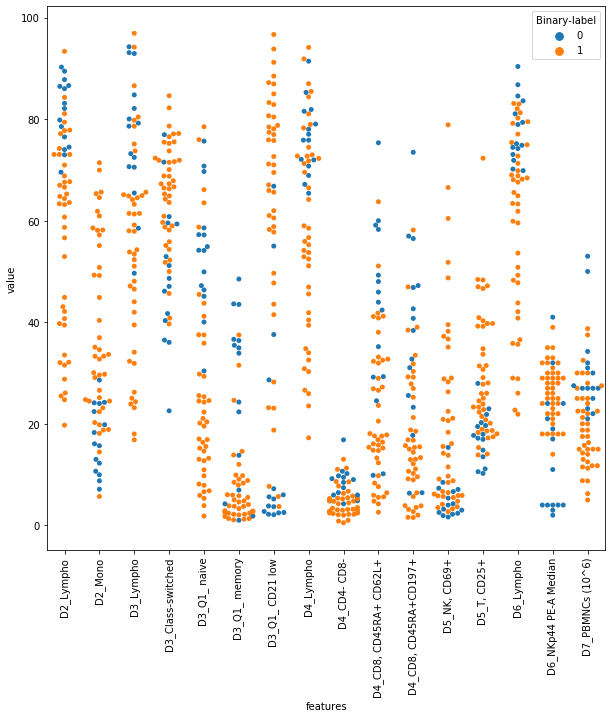

In [38]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_male_selected_small_melt)

plt.xticks(rotation=90)

In [35]:
multi_cols_female_small = multi_cols_female.drop(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8'])
multi_cols_female_small

Index(['D1_%CD19', 'D2_Lympho', 'D2_Mono', 'D2_Mono, CD14+ HLA_DR+',
       'D2_B cells', 'D3_Lympho', 'D3_B cells', 'D3_Class-switched',
       'D3_Q1_ naive', 'D3_Q1_ memory', 'D3_Q1_ CD21 low', 'D4_Lympho',
       'D4_T cells', 'D4_NK, CD62L+', 'D5_T cell', 'D5_NK, CD69+', 'D6_Lympho',
       'D6_T cells', 'Binary-label'],
      dtype='object')

In [36]:
data_female_selected_small = data_female[multi_cols_female_small]
data_female_selected_small_melt = pd.melt(data_female_selected_small, id_vars="Binary-label",
               var_name="features",
               value_name="value")

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

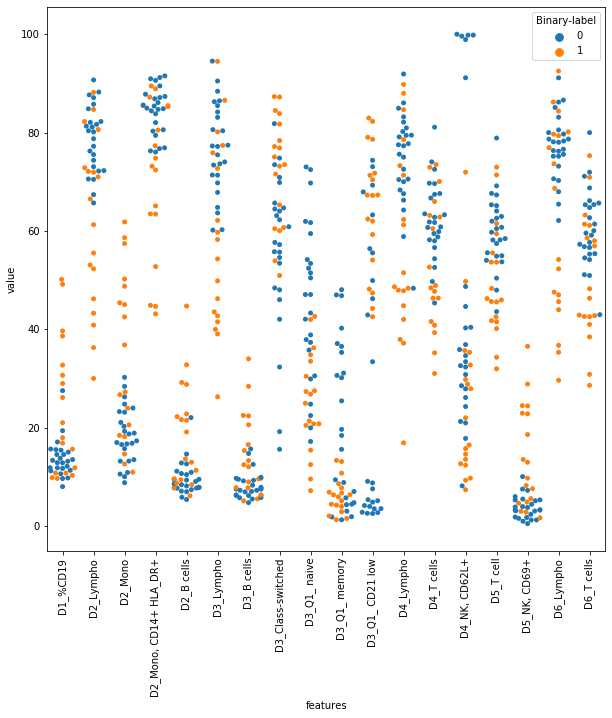

In [37]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_female_selected_small_melt)

plt.xticks(rotation=90)